In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import time

In [2]:
data = pd.read_csv(r'd:\VM_win10\общая_папка\selenium_crash\my_file.csv')
data

,data,session,multiplier,session_ls,win_amount,number,death,Amount,a,w
0,NaN,6138470,1.08,1709371201421,29437.84,4648,4553,940533.38,-1,-1
1,2024-03-02 12:20:39.051415,6138470,1.08,1709371201421,29437.84,4648,4553,940533.38,6997,3000
2,2024-03-02 12:20:42.623804,6138472,1.16,1709371219889,141584.12,3933,3613,845521.60,6997,3000
3,2024-03-02 12:20:49.870938,6138472,1.16,1709371219889,141584.12,3933,3613,845521.60,6997,3000
4,2024-03-02 12:20:57.021767,6138472,1.16,1709371219889,141584.12,3933,3613,841324.63,6997,3000
...,...,...,...,...,...,...,...,...,...,...
26988,2024-03-16 21:27:44.915696,90162,-1.00,-1,944241.11,6010,2205,385955.42,6997,3000
26989,2024-03-16 21:27:48.093993,90165,-1.00,-1,-1.00,-1,-1,787242.10,6997,3000
26990,2024-03-16 21:27:57.656358,90165,1.02,1710613699177,-1.00,-1,-1,919163.85,6997,3000
26991,2024-03-16 21:28:04.048861,90167,-1.00,-1,-1.00,-1,-1,369571.10,6997,3000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26993 entries, 0 to 26992
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        26975 non-null  object 
 1   session     26993 non-null  int64  
 2   multiplier  26993 non-null  float64
 3   session_ls  26993 non-null  int64  
 4   win_amount  26993 non-null  float64
 5   number      26993 non-null  int64  
 6   death       26993 non-null  int64  
 7   Amount      26993 non-null  float64
 8   a           26993 non-null  int64  
 9   w           26993 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ MB


In [4]:
data.describe()

,session,multiplier,session_ls,win_amount,number,death,Amount,a,w
count,2.699300e+04,26993.000000,2.699300e+04,2.699300e+04,26993.000000,26993.000000,2.699300e+04,26993.000000,26993.000000
mean,6.067248e+06,3.002554,1.251929e+12,9.776968e+05,5492.807950,3282.277924,9.202276e+05,6799.739599,2922.298929
std,7.143471e+05,5.730001,7.568770e+11,1.548213e+06,4042.590655,3280.902322,5.898461e+05,1142.869830,475.267329
min,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,6.145749e+06,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,4.456053e+05,6997.000000,3000.000000
50%,6.152366e+06,1.430000,1.709440e+12,2.101780e+05,6090.000000,2623.000000,9.105104e+05,6997.000000,3000.000000
75%,6.158996e+06,3.020000,1.709518e+12,1.330737e+06,8728.000000,5670.000000,1.356867e+06,6997.000000,3000.000000
max,6.173919e+06,34.610000,1.710614e+12,1.192608e+07,14940.000000,14270.000000,2.804765e+06,6998.000000,3000.000000


In [5]:
data['a'].unique()

array([  -1, 6997, 6996, 6742, 6998,    0, 6994, 6995, 4960, 6706,   64,
       6991, 6917, 5036, 6992, 6989, 6990, 6750, 6993, 5019, 6468, 6776,
       3591, 6711, 6862, 6982, 2695, 6952,  590, 6988, 1835, 6275, 6886,
       6333,  364, 1676, 4489, 6373, 3168,   46, 6984, 5728, 5989, 2590,
       5863, 3014, 2676, 3056, 6979, 4508, 1657, 1550,  491, 2211, 1287,
       6955, 3139, 5982, 4123, 6314, 5233, 1049, 6913, 4598, 2562, 1892,
       6694, 6983, 6921, 6936, 6749, 6972, 6766, 6987, 6977, 4349, 6805,
       6441, 6761, 3573, 6875, 2644], dtype=int64)

In [6]:
list_value = [  -1, 6996, 6742, 6998,    0, 6994, 6995, 4960, 6706,   64,
       6991, 6917, 5036, 6992, 6989, 6990, 6750, 6993, 5019, 6468, 6776,
       3591, 6711, 6862, 6982, 2695, 6952,  590, 6988, 1835, 6275, 6886,
       6333,  364, 1676, 4489, 6373, 3168,   46, 6984, 5728, 5989, 2590,
       5863, 3014, 2676]
data[data['a'].isin(list_value)]

,data,session,multiplier,session_ls,win_amount,number,death,Amount,a,w
0,NaN,6138470,1.08,1709371201421,29437.84,4648,4553,940533.38,-1,-1
100,2024-03-02 12:27:44.722160,6138524,2.18,1709371639499,428629.51,3409,2005,793526.46,-1,-1
115,2024-03-02 12:28:59.784675,6138532,3.60,1709371714517,1479235.52,4988,1428,1051626.81,-1,-1
186,2024-03-02 12:33:56.050563,6138569,2.11,1709372007637,829298.39,5316,3014,1073163.57,6996,3000
187,2024-03-02 12:33:59.615542,6138569,2.11,1709372007637,829298.39,5316,3014,1073163.57,6996,3000
...,...,...,...,...,...,...,...,...,...,...
26935,2024-03-16 21:20:14.533771,90105,4.19,1710613236517,1596490.80,6761,1674,906084.92,6998,3000
26940,2024-03-16 21:21:03.240250,90113,2.58,1710613282842,916277.30,7814,3606,280818.78,6998,3000
26941,2024-03-16 21:21:19.252404,90114,1.11,1710613300373,22620.88,8203,8009,1253619.73,6998,3000
26943,2024-03-16 21:21:58.843963,90119,2.78,1710613342619,770739.31,6296,3184,926803.90,6998,3000


In [7]:
list_value = [0,  191, 1826,  596, 2137, 1774, 2745,  472, 1224]
data[data['w'].isin(list_value)]

,data,session,multiplier,session_ls,win_amount,number,death,Amount,a,w
575,2024-03-02 17:21:30.177308,6140735,5.86,1709389298221,2507062.08,7780,939,1000067.99,0,0
1085,2024-03-02 18:13:07.696979,6141124,1.07,1709392384081,-1.00,-1,-1,1345938.61,0,191
1595,2024-03-02 19:04:43.702094,6141509,3.06,1709395464495,1361868.99,9071,4183,399501.01,0,0
1596,2024-03-02 19:04:46.816950,6141512,2.97,1709395489505,2015954.67,10376,4201,1736037.00,0,0
2062,2024-03-02 21:11:10.780504,6142445,28.63,1709403101424,6126582.94,9831,109,1761694.04,0,1826
2202,2024-03-02 21:26:07.080262,6142559,1.37,1709403966258,299210.13,10476,9255,1980549.06,0,596
2300,2024-03-02 21:35:07.764822,6142623,1.20,1709404508949,107089.08,7677,7165,1479936.29,0,2137
3415,2024-03-02 23:38:29.543210,6143548,1.72,1709411908394,461042.76,8290,6675,1485976.81,0,0
4027,2024-03-03 00:42:56.741833,6144024,1.06,1709415768931,22690.93,8826,8736,1519508.02,0,0
4441,2024-03-03 01:25:48.742238,6144343,8.66,1709418359345,4485931.63,9183,1201,1869365.88,0,0


In [8]:
data = data.replace(-1, np.nan)
data = data.dropna()
data.describe()

,session,multiplier,session_ls,win_amount,number,death,Amount,a,w
count,1.536000e+04,15360.000000,1.536000e+04,1.536000e+04,15360.000000,15360.000000,1.536000e+04,15360.000000,15360.000000
mean,6.067095e+06,4.335669,1.709496e+12,1.391439e+06,7690.759505,4575.158724,9.489102e+05,6968.448503,2995.417383
std,7.122271e+05,5.715807,1.465972e+08,1.712380e+06,2470.797949,3039.681519,5.912057e+05,395.883198,110.982944
min,8.966300e+04,1.000000,1.709371e+12,7.604000e+01,89.000000,15.000000,2.337100e+02,0.000000,0.000000
25%,6.145201e+06,1.380000,1.709428e+12,1.487878e+05,5672.750000,2065.000000,4.325621e+05,6997.000000,3000.000000
50%,6.150128e+06,2.090000,1.709480e+12,5.969059e+05,7672.500000,4287.000000,9.297064e+05,6997.000000,3000.000000
75%,6.158634e+06,4.120000,1.709537e+12,2.104679e+06,9473.000000,6802.500000,1.406999e+06,6997.000000,3000.000000
max,6.173919e+06,34.610000,1.710614e+12,1.192608e+07,14940.000000,14236.000000,2.804765e+06,6998.000000,3000.000000


In [9]:
data['data'] = pd.to_datetime(data['data'])

In [10]:
data = data.set_index('data')

In [11]:
data = data.drop_duplicates(['session'])

In [12]:
df = data[['multiplier','win_amount', 'number', 'death','Amount', 'a', 'w']]

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['number', 'Amount']])
df[['number', 'Amount']] = scaler.transform(df[['number', 'Amount']])

C:\Users\user\AppData\Local\Temp\ipykernel_16948\334808576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['number', 'Amount']] = scaler.transform(df[['number', 'Amount']])


In [14]:
df_new = df.copy()
df_new['second'] = df_new.index.second
df_new['minute'] = df_new.index.minute
df_new['hour'] = df_new.index.hour
df_new.head()

,multiplier,win_amount,number,death,Amount,a,w,second,minute,hour
data,,,,,,,,,,
2024-03-02 12:20:39.051415,1.08,29437.84,-1.260121,4553.0,-1.047193,6997.0,3000.0,39,20,12
2024-03-02 12:20:42.623804,1.16,141584.12,-1.551567,3613.0,-1.280920,6997.0,3000.0,42,20,12
2024-03-02 12:21:04.151947,1.17,148663.12,-1.597628,3473.0,-1.291244,6997.0,3000.0,4,21,12
2024-03-02 12:21:22.038906,1.09,37344.53,-1.570725,3742.0,-0.959742,6997.0,3000.0,22,21,12
2024-03-02 12:21:39.905235,1.31,108667.72,-1.635536,3242.0,-1.115289,6997.0,3000.0,39,21,12


In [15]:
for lag in range(1, 11):
        df_new['lag_{}'.format(lag)] = df_new['multiplier'].shift(lag)

In [16]:
df_new['rolling_mean'] = df_new['multiplier'].shift().rolling(10).mean()
# Удаляем пропуски
df_new = df_new.dropna(axis=0)

In [17]:
df_new = df_new.drop(['a', 'w'], axis = 1)

In [18]:
df_new

,multiplier,win_amount,number,death,Amount,second,minute,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,rolling_mean
data,,,,,,,,,,,,,,,,,,,
2024-03-02 12:23:41.239211,1.15,127732.54,-1.707684,3244.0,-1.213926,41,23,12,1.52,1.07,1.08,1.48,2.63,1.31,1.09,1.17,1.16,1.08,1.359
2024-03-02 12:23:55.534673,1.67,238703.26,-1.919645,2281.0,-1.375922,55,23,12,1.15,1.52,1.07,1.08,1.48,2.63,1.31,1.09,1.17,1.16,1.366
2024-03-02 12:24:17.594892,17.16,2749964.38,-1.772495,131.0,-1.238281,17,24,12,1.67,1.15,1.52,1.07,1.08,1.48,2.63,1.31,1.09,1.17,1.417
2024-03-02 12:25:00.422320,6.10,1738290.65,-1.496539,682.0,-1.411722,0,25,12,17.16,1.67,1.15,1.52,1.07,1.08,1.48,2.63,1.31,1.09,3.016
2024-03-02 12:25:29.003143,6.23,1919178.18,-1.492463,448.0,-1.272079,29,25,12,6.10,17.16,1.67,1.15,1.52,1.07,1.08,1.48,2.63,1.31,3.517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-16 21:26:33.421596,1.15,48931.32,-0.288771,6764.0,-0.470383,33,26,21,2.62,1.30,1.52,1.89,1.44,3.01,1.27,1.15,1.57,1.69,1.746
2024-03-16 21:26:52.875620,1.83,288442.09,-0.832939,4022.0,-0.975435,52,26,21,1.15,2.62,1.30,1.52,1.89,1.44,3.01,1.27,1.15,1.57,1.692
2024-03-16 21:27:15.777532,2.05,475808.50,-0.784433,3632.0,-0.788303,15,27,21,1.83,1.15,2.62,1.30,1.52,1.89,1.44,3.01,1.27,1.15,1.718


In [19]:
train, test = train_test_split(df_new, shuffle=False, test_size=0.1)
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2024-03-02 12:23:41.239211 2024-03-04 21:09:53.079152
2024-03-04 21:10:23.788331 2024-03-16 21:28:20.251225


In [20]:
X_train = train.drop(['multiplier'], axis = 1)
y_train = train['multiplier']
X_test = test.drop(['multiplier'], axis = 1)
y_test = test['multiplier']

In [76]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.optimizers import Adam

In [82]:
scaler = MinMaxScaler()
X_scaled_train = scaler.fit_transform(X_train)
y_scaled_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
X_scaled_test = scaler.fit_transform(X_test)
y_scaled_test = scaler.fit_transform(y_test.values.reshape(-1, 1))

In [83]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_scaled_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.0001)  # Установка learning_rate равным 0.0001
model.compile(loss='mean_squared_error', optimizer=optimizer)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)
model.fit(X_scaled_train, y_scaled_train, epochs=20, batch_size=32,validation_data=(X_scaled_test, y_scaled_test), callbacks=[early_stopping])


Epoch 1/20
201/201 [==============================] - 6s 17ms/step - loss: 0.0330 - val_loss: 0.0293
Epoch 2/20
201/201 [==============================] - 3s 13ms/step - loss: 0.0325 - val_loss: 0.0292
Epoch 3/20
201/201 [==============================] - 3s 12ms/step - loss: 0.0322 - val_loss: 0.0293
Epoch 4/20
201/201 [==============================] - 3s 13ms/step - loss: 0.0322 - val_loss: 0.0292
Epoch 5/20
201/201 [==============================] - 2s 12ms/step - loss: 0.0322 - val_loss: 0.0292
Epoch 6/20
201/201 [==============================] - 3s 13ms/step - loss: 0.0322 - val_loss: 0.0292


23/23 [==============================] - 1s 7ms/step


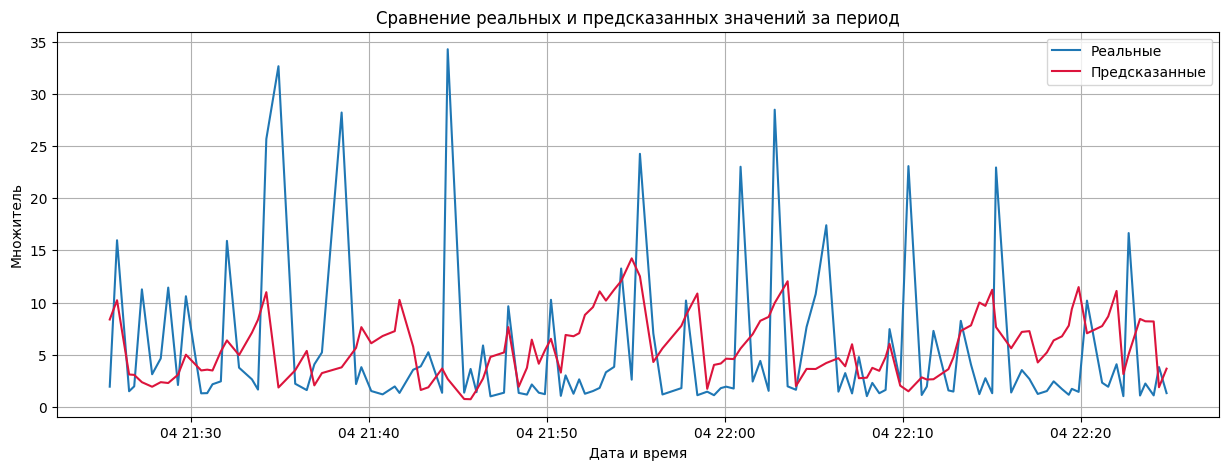

In [84]:
train_predictions = model.predict(X_test)
train_predictions_inverse = scaler.inverse_transform(train_predictions)
plt.figure(figsize=(15, 5))
plt.xlabel('Дата и время')
plt.ylabel('Множитель')
plt.plot(y_test['2024-03-04 21:25:00':'2024-03-04 22:25:00'], label='Реальные')
plt.plot(X_test['2024-03-04 21:25:00':'2024-03-04 22:25:00'].index, train_predictions_inverse[:124]-min(train_predictions_inverse), label='Предсказанные', color='crimson')
plt.title('Cравнение реальных и предсказанных значений за период')
plt.legend()
plt.grid(True)

In [21]:
params =  {'max_depth': range (4,15),
          'n_estimators': range(10, 155, 15) }
           

model_l = LGBMRegressor(max_depth=7, n_estimators=70)
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
rmse = round(mean_squared_error(y_test, y_pred)**0.5, 3)

print('RMSE на тестовой выборке:', rmse)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3969
[LightGBM] [Info] Number of data points in the train set: 6411, number of used features: 18
[LightGBM] [Info] Start training from score 4.535096


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [23]:
model = CatBoostRegressor(verbose=False, depth=7, learning_rate=0.03)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = round(mean_squared_error(y_test, y_pred)**0.5, 3)

print('RMSE на тестовой выборке:', rmse)

RMSE на тестовой выборке: 1.891


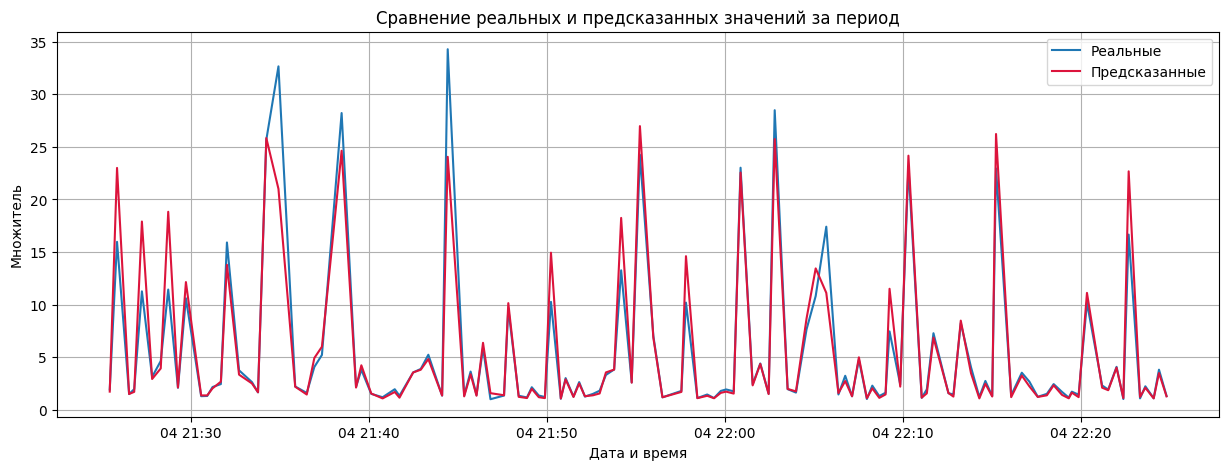

In [24]:
y_pred = pd.Series(y_pred, index=y_test.index)
plt.figure(figsize=(15, 5))
plt.xlabel('Дата и время')
plt.ylabel('Множитель')
plt.plot(y_test['2024-03-04 21:25:00':'2024-03-04 22:25:00'], label='Реальные')
plt.plot(y_pred['2024-03-04 21:25:00':'2024-03-04 22:25:00'], label='Предсказанные', color='crimson')
plt.title('Cравнение реальных и предсказанных значений за период')
plt.legend()
plt.grid(True)

In [25]:
ac = pd.DataFrame(data=y_test)
ac['multiplier_pred'] = y_pred
ac['data'] = ac.index
ac.reset_index(inplace=True, drop=True)

In [26]:
ac_copy = ac.copy()
ac_copy['A'] = pd.Series([None] * len(ac_copy), index=ac_copy.index)

In [27]:
ac_copy['A'] = ac_copy.apply(lambda x: x['multiplier_pred']-3 , axis=1)

In [28]:
ac_copy['A'] = ac_copy.apply(lambda x: x['A'] if x['A']>1 else 1 , axis=1)

In [29]:
ac_copy.set_index('data', inplace=True)

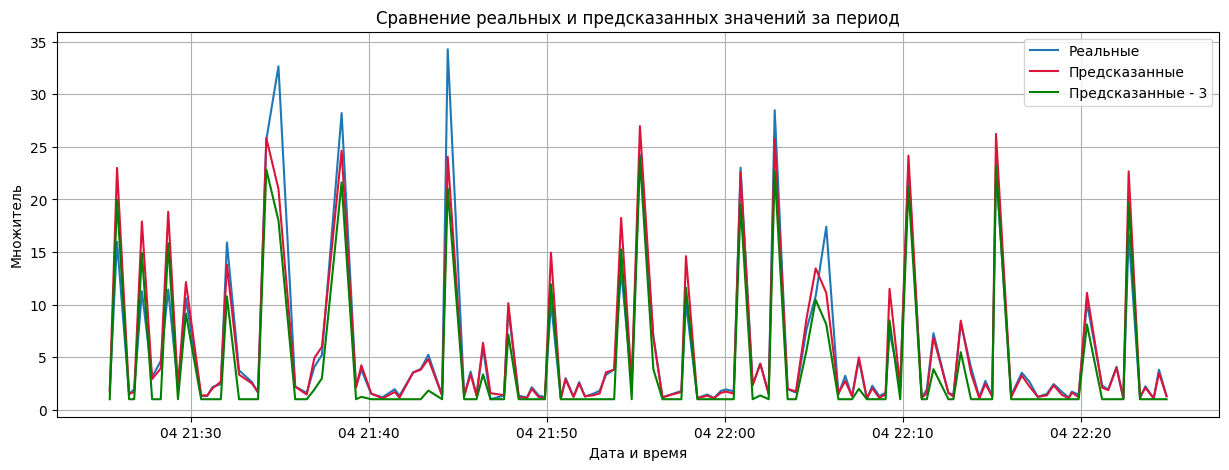

In [30]:
plt.figure(figsize=(15, 5))
plt.xlabel('Дата и время')
plt.ylabel('Множитель')
plt.plot(ac_copy.loc['2024-03-04 21:25:00':'2024-03-04 22:25:00','multiplier'], label='Реальные')
plt.plot(ac_copy.loc['2024-03-04 21:25:00':'2024-03-04 22:25:00', 'multiplier_pred'], label='Предсказанные', color='crimson')
plt.plot(ac_copy.loc['2024-03-04 21:25:00':'2024-03-04 22:25:00', 'A'], label='Предсказанные - 3', color='green')
plt.title('Cравнение реальных и предсказанных значений за период')
plt.legend()
plt.grid(True)

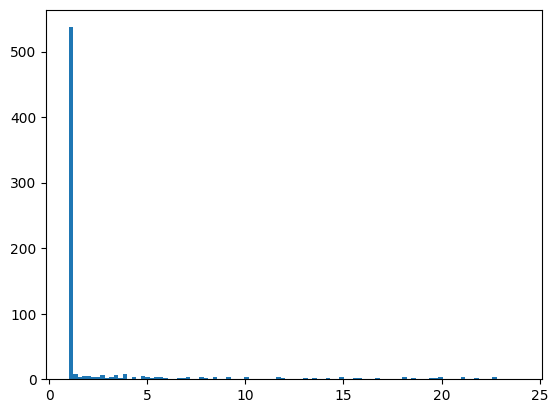

In [31]:
plt.hist(ac_copy['A'], bins=100)
plt.show()

In [32]:
ac_copy['B'] = ac_copy.apply(lambda x: 1 if x['A']<=x['multiplier'] else 0 , axis=1)
percent = np.sum(ac_copy['B']) / len(ac_copy['B']) * 100
print(f"Процент верности: {percent:.2f}%")

Процент верности: 95.23%


In [33]:
while True:
    try:
        data_new = pd.read_csv(r'd:\VM_win10\общая_папка\selenium_crash\my_file_new.csv')

        for i in range(data_new.shape[0]-11,data_new.shape[0]-1):
            data = pd.read_csv(r'd:\VM_win10\общая_папка\selenium_crash\my_file.csv')
            data = data.replace(-1, np.nan)
            data = data.dropna()
            data.describe()
            data = data.drop_duplicates(['session'])
            data = data.drop(['session','session_ls', 'a', 'w'], axis = 1)  
            data_dict = {'data': [data_new.iloc[i]['data']], 
                        'multiplier': [data.iloc[-1]['multiplier']], 
                        'number': [data_new.iloc[i]['number']], 
                        'Amount': [data_new.iloc[i]['Amount']],
                        'win_amount': [data_new.iloc[i]['win_amount']],
                        'death': [data_new.iloc[i]['death']]
                        }
            
            data_dict = pd.DataFrame(data_dict)
            data[['number', 'Amount']] = scaler.transform(data[['number', 'Amount']])  
            data = pd.concat([data, data_dict], ignore_index=True)  
            data['data'] = pd.to_datetime(data['data'])
            data = data.set_index('data')
            data = data.tail(100)
            data['second'] = data.index.second
            data['minute'] = data.index.minute
            data['hour'] = data.index.hour
            for lag in range(1, 11):
                data['lag_{}'.format(lag)] = data['multiplier'].shift(lag) 
            data['rolling_mean'] = data['multiplier'].shift().rolling(10).mean()   
            data = data.drop(['multiplier'], axis = 1)
            try:
                y_pred = model.predict(data.tail(1))          
                # print(data.tail(1))
                print(y_pred)   
            except:
                print('---'*10) 
                display(data.tail(1))
                print('---'*10) 
                continue                 
            time.sleep(1)
    except:
        continue
    
    

[7.55697346]
[7.55697346]
[0.9527558]
[0.94987019]
[0.94987019]
[0.94987019]
[0.94987019]
[0.94987019]
[0.94987019]
[0.94987019]
[1.37118354]
[8.65072407]
[8.20511172]
[8.20511172]
[8.74930221]
[8.13826704]
[8.13826704]
[8.13826704]
[8.13826704]
[8.13826704]
[8.28398558]
[8.28398558]
[9.43832554]
[0.97033912]
[0.97033912]
[0.97033912]
[0.97033912]
[0.97033912]
[0.97033912]
[0.97033912]
[8.99678483]
[8.99678483]
[9.77553651]
[9.77553651]
[9.77553651]
[9.77553651]
[9.77553651]
[9.77553651]
[9.77553651]
[8.62685451]
[1.1946191]
[1.46479261]
[1.736447]
[2.1238662]
[2.3397386]
[0.97715503]
[1.11160709]
[1.18428996]
[1.45446347]
[1.72611786]
[8.9878568]
[8.9878568]
[8.9878568]
[8.99899805]
[8.99899805]
[8.99899805]
[8.5822083]
[8.5822083]
[8.5822083]
[8.5822083]
[8.5822083]
[8.5822083]
[8.5822083]
[0.97736672]
[1.00814741]
[1.00814741]
[1.00814741]
[1.00814741]
[0.98542274]
[9.46198106]
[8.6273227]
[8.39023318]
[8.07467094]
[8.07467094]
[8.07467094]
[8.07467094]
[8.07467094]
[0.93756363]
[0.